In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats

In [3]:
age_gender = pd.read_csv("age_gender_bkts.csv")
countries = pd.read_csv("countries.csv")
session = pd.read_csv("sessions.csv")
train_user = pd.read_csv("train_users_2.csv")
test_user = pd.read_csv("test_users.csv")

session["action] 종류와 빈도수 체크
시각화

In [55]:
action_counts = session['action'].value_counts().reset_index()
action_counts.columns = ['action', 'count']

action_stats = session.groupby('action')['secs_elapsed'].agg(['count', 'sum', 'mean', 'median', 'std', 'min', 'max']).reset_index()

print(action_stats.head())


     action  count          sum           mean    median            std  \
0        10   3215  389758599.0  121231.290513   47140.0  227279.668720   
1        11    716   89564479.0  125090.054469   72556.0  177949.710073   
2        12   2209  793156099.0  359056.631507  179000.0  426802.680152   
3        15   1053   96135214.0   91296.499525   54223.0  132471.176286   
4  about_us    416   26370565.0   63390.781250   18627.5  170284.744293   

     min        max  
0    5.0  1799949.0  
1  202.0  1779482.0  
2    0.0  1782975.0  
3   13.0  1759000.0  
4   12.0  1656260.0  


In [56]:
print(action_stats)

             action    count
0              show  2768278
1             index   843699
2    search_results   725226
3       personalize   706824
4            search   536057
..              ...      ...
354     deauthorize        1
355          events        1
356      reactivate        1
357           desks        1
358            nyan        1

[359 rows x 2 columns]
                           action  count          sum           mean  \
0                              10   3215  389758599.0  121231.290513   
1                              11    716   89564479.0  125090.054469   
2                              12   2209  793156099.0  359056.631507   
3                              15   1053   96135214.0   91296.499525   
4                        about_us    416   26370565.0   63390.781250   
..                            ...    ...          ...            ...   
354  weibo_signup_referral_finish     45    1017408.0   22609.066667   
355                      why_host    180   13323508.

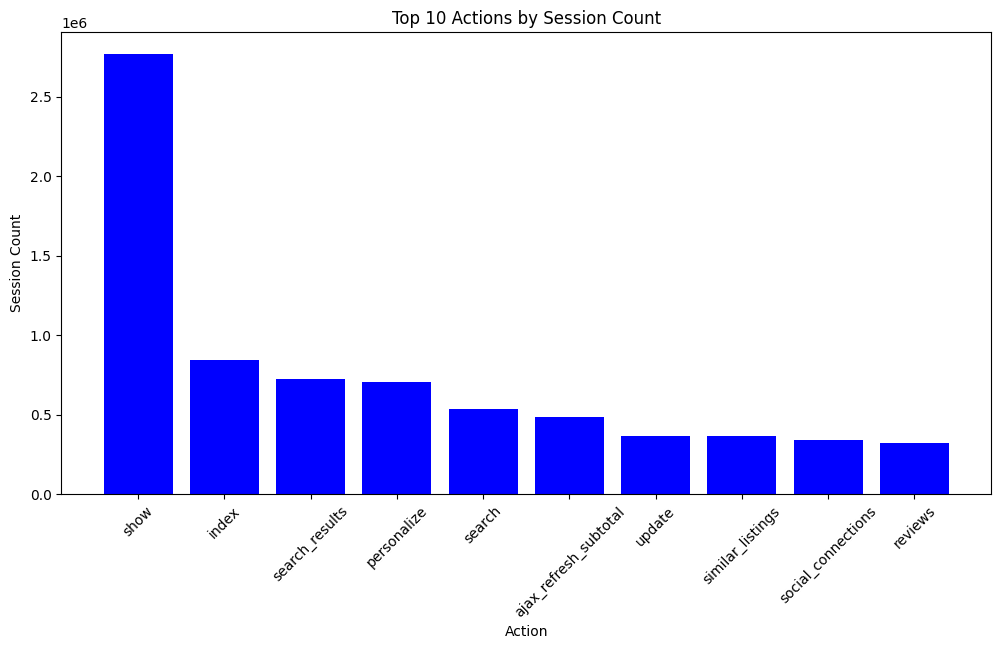

In [57]:
top_10_actions = action_counts.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_actions['action'], top_10_actions['count'], color='blue')
plt.title('Top 10 Actions by Session Count')
plt.xlabel('Action')
plt.ylabel('Session Count')
plt.xticks(rotation=45)
plt.show()

In [59]:
action_stats = session.groupby('action')['secs_elapsed'].agg(
    count='count',
    total_time='sum',
    avg_time='mean',
    median_time='median',
    std_time='std',
    min_time='min',
    max_time='max'
).reset_index()


     action  count   total_time       avg_time  median_time       std_time  \
0        10   3215  389758599.0  121231.290513      47140.0  227279.668720   
1        11    716   89564479.0  125090.054469      72556.0  177949.710073   
2        12   2209  793156099.0  359056.631507     179000.0  426802.680152   
3        15   1053   96135214.0   91296.499525      54223.0  132471.176286   
4  about_us    416   26370565.0   63390.781250      18627.5  170284.744293   

   min_time   max_time  
0       5.0  1799949.0  
1     202.0  1779482.0  
2       0.0  1782975.0  
3      13.0  1759000.0  
4      12.0  1656260.0  


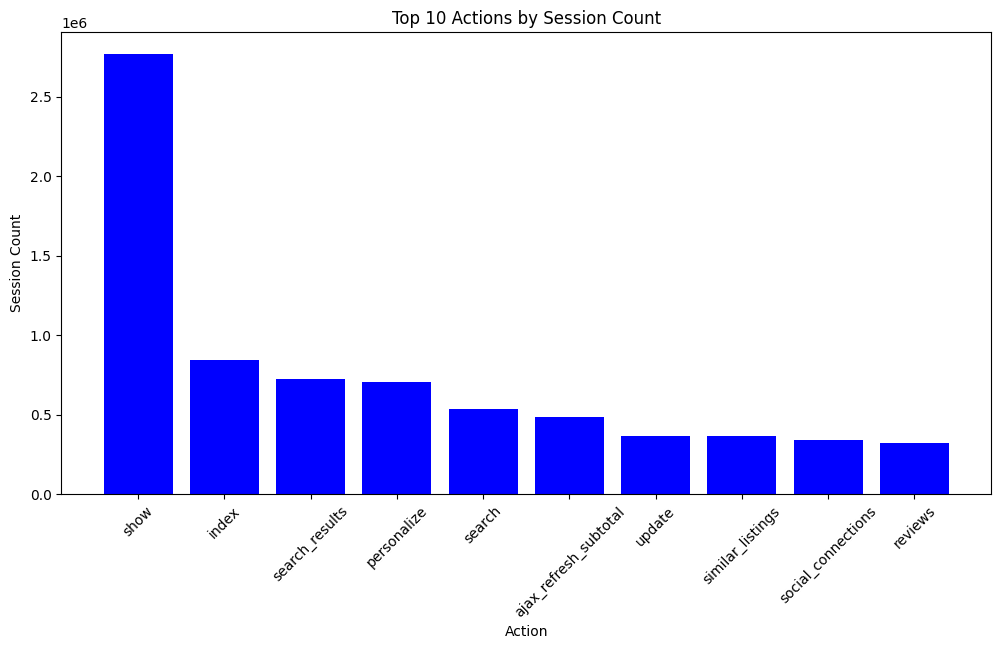

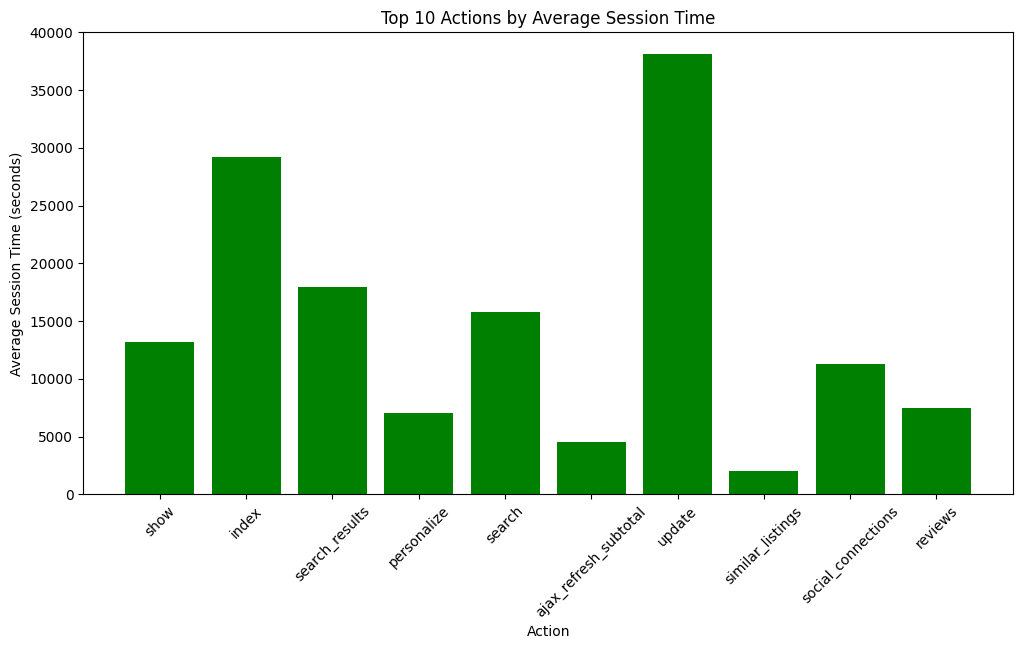

In [60]:
top_10_actions = action_stats.nlargest(10, 'count')

plt.figure(figsize=(12, 6))
plt.bar(top_10_actions['action'], top_10_actions['count'], color='blue')
plt.title('Top 10 Actions by Session Count')
plt.xlabel('Action')
plt.ylabel('Session Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_10_actions['action'], top_10_actions['avg_time'], color='green')
plt.title('Top 10 Actions by Average Session Time')
plt.xlabel('Action')
plt.ylabel('Average Session Time (seconds)')
plt.xticks(rotation=45)
plt.show()

unique 값이 400개가 넘기에 상위 10개만 진행

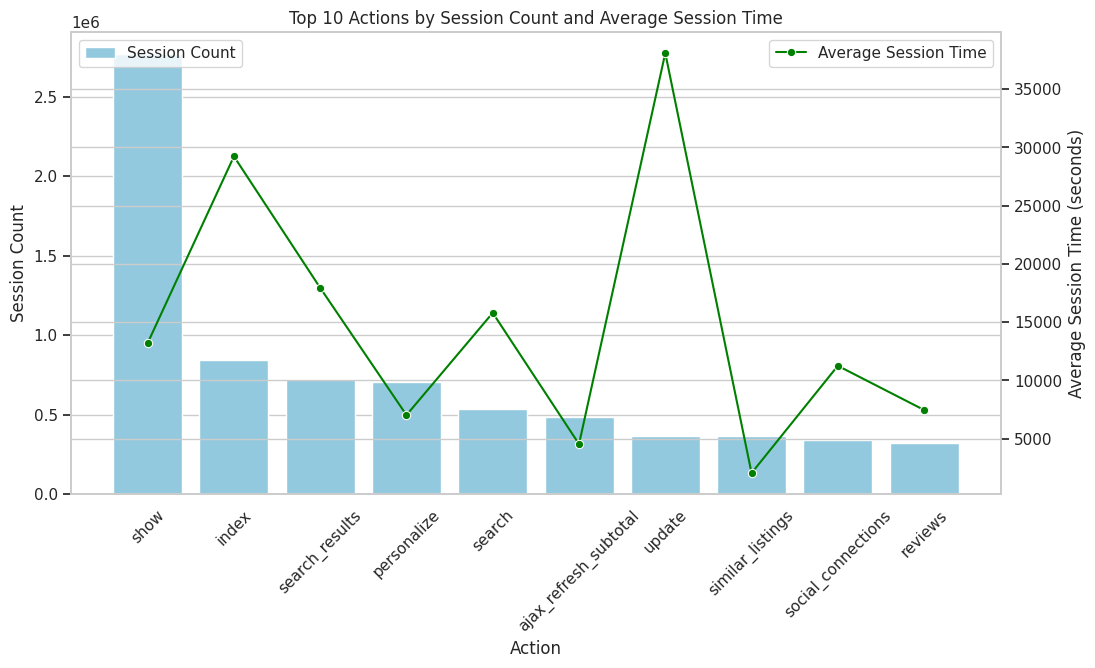

In [62]:
sns.set(style="whitegrid")


fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(x='action', y='count', data=top_10_actions, ax=ax1, color='skyblue', label='Session Count')
ax1.set_xlabel('Action')
ax1.set_ylabel('Session Count')
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
sns.lineplot(x='action', y='avg_time', data=top_10_actions, ax=ax2, color='green', marker='o', label='Average Session Time')
ax2.set_ylabel('Average Session Time (seconds)')


plt.title('Top 10 Actions by Session Count and Average Session Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

신규 유저의 첫 예약 비율

In [9]:
train_user['first_booking_made'] = train_user['date_first_booking'].notnull()

first_booking_rate = train_user['first_booking_made'].mean() * 100
print(f'First Booking Rate: {first_booking_rate:.2f}%')


First Booking Rate: 41.65%


월별 비율

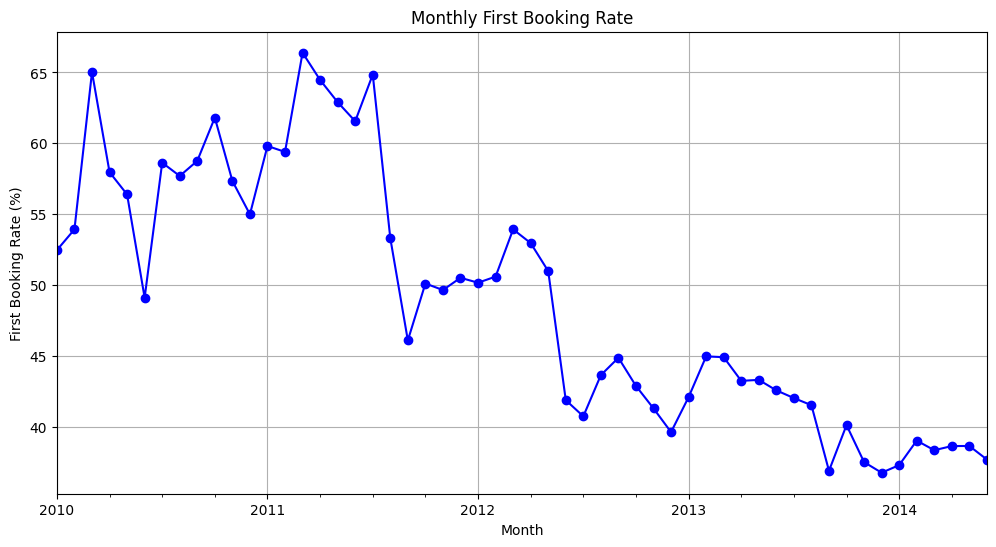

In [29]:

train_user['date_account_created'] = pd.to_datetime(train_user['date_account_created'])
train_user['date_first_booking'] = pd.to_datetime(train_user['date_first_booking'])


train_user['first_booking_made'] = train_user['date_first_booking'].notnull()


train_user['month_account_created'] = train_user['date_account_created'].dt.to_period('M')


monthly_booking = train_user.groupby('month_account_created')['first_booking_made'].mean() * 100

plt.figure(figsize=(12, 6))
monthly_booking.plot(kind='line', color='blue', marker='o')
plt.title('Monthly First Booking Rate')
plt.xlabel('Month')
plt.ylabel('First Booking Rate (%)')
plt.grid(True)
plt.show()

월별, 일별, 주별 신규 유저 와 빈도수

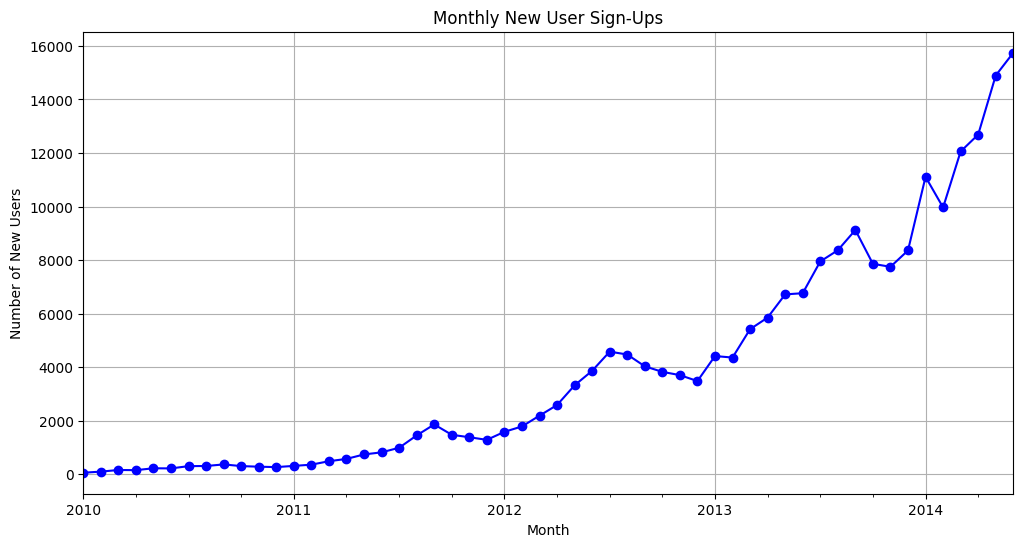

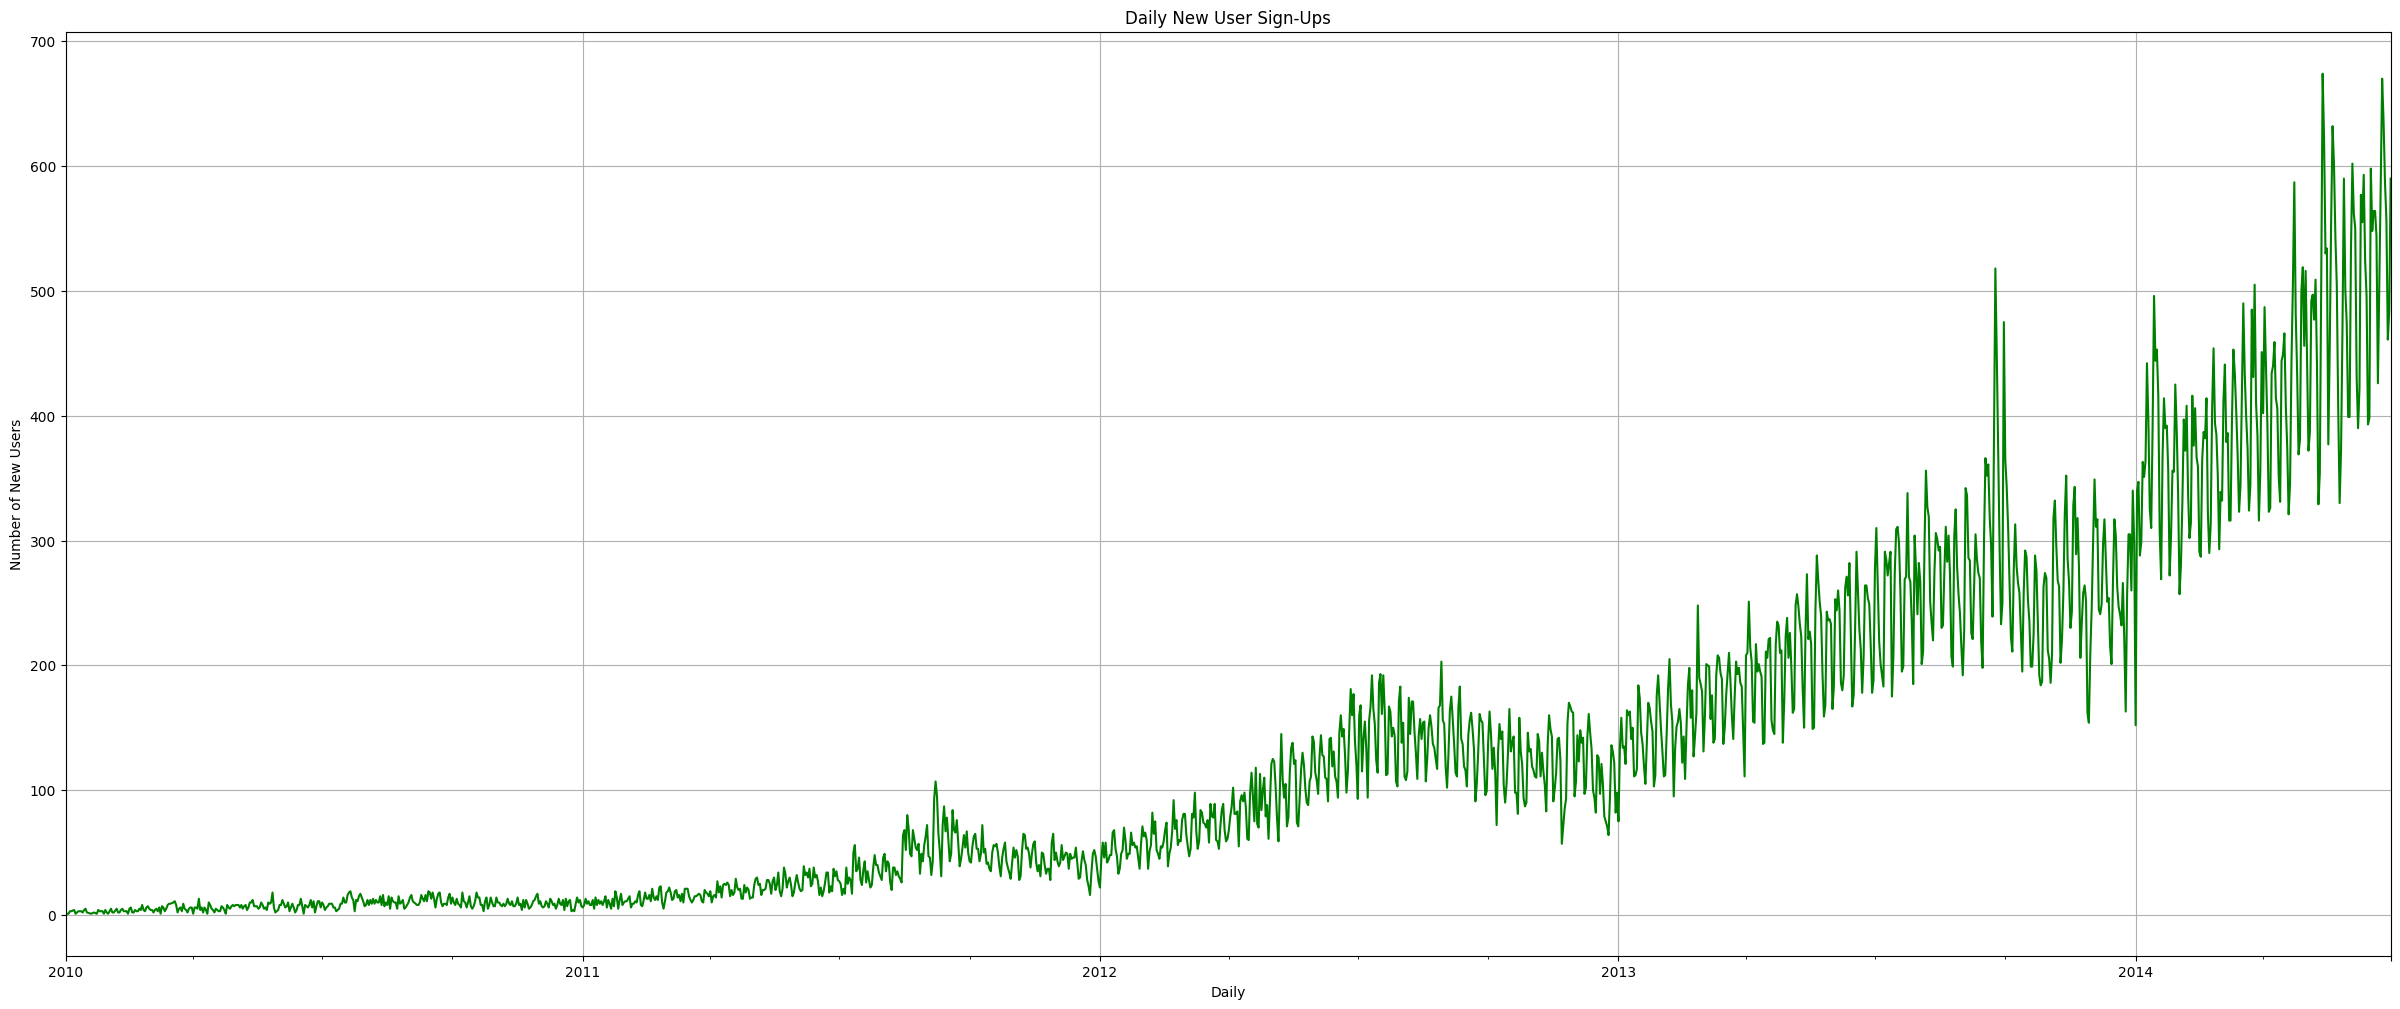

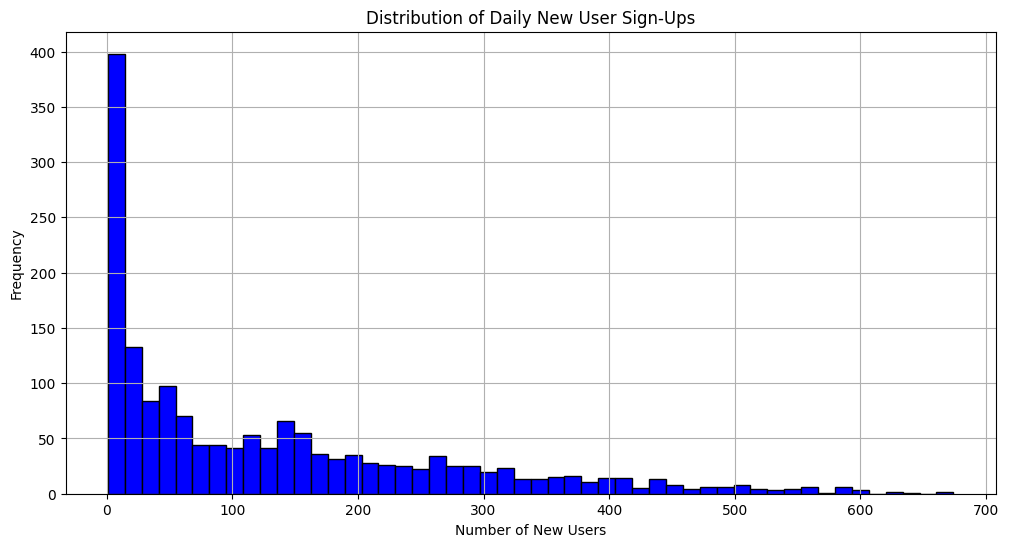

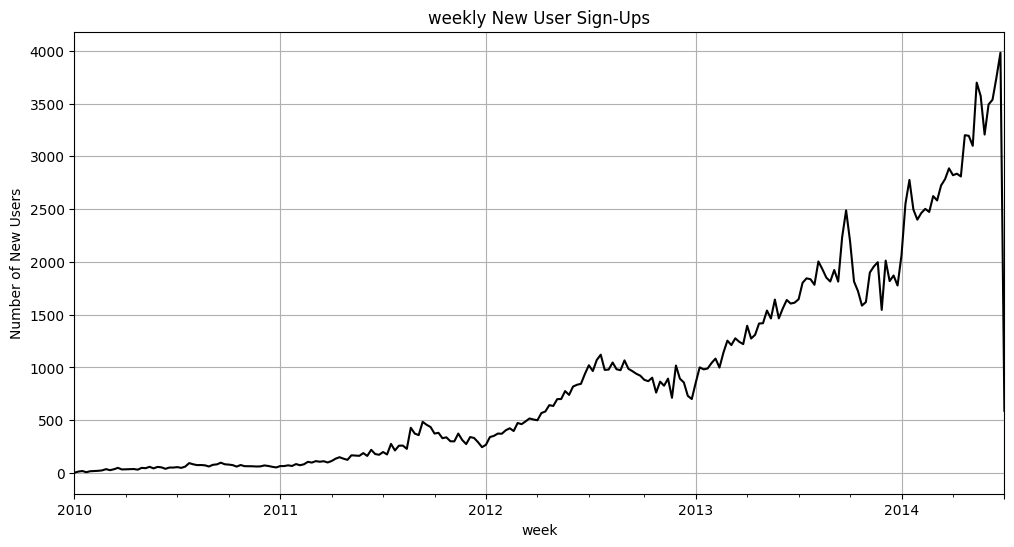

In [31]:



train_user['date_account_created'] = pd.to_datetime(train_user['date_account_created'])


monthly_new_users = train_user['date_account_created'].dt.to_period('M').value_counts().sort_index()
daily_new_users = train_user['date_account_created'].dt.to_period('D').value_counts().sort_index()
weekly_new_users = train_user['date_account_created'].dt.to_period('W').value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_new_users.plot(kind='line', color='blue', marker='o')
plt.title('Monthly New User Sign-Ups')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.grid(True)
plt.show()


plt.figure(figsize=(30, 12))
daily_new_users.plot(kind='line', color='green',)
plt.title('Daily New User Sign-Ups')
plt.xlabel('Daily')
plt.ylabel('Number of New Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(daily_new_users, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Daily New User Sign-Ups')
plt.xlabel('Number of New Users')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
weekly_new_users.plot(kind='line', color='black')
plt.title('weekly New User Sign-Ups')
plt.xlabel('week')
plt.ylabel('Number of New Users')
plt.grid(True)
plt.show()



위의 월별 신규 사용자와 월별 신규 사용자의 첫 예약 비율을 플롯 하나로 시각화

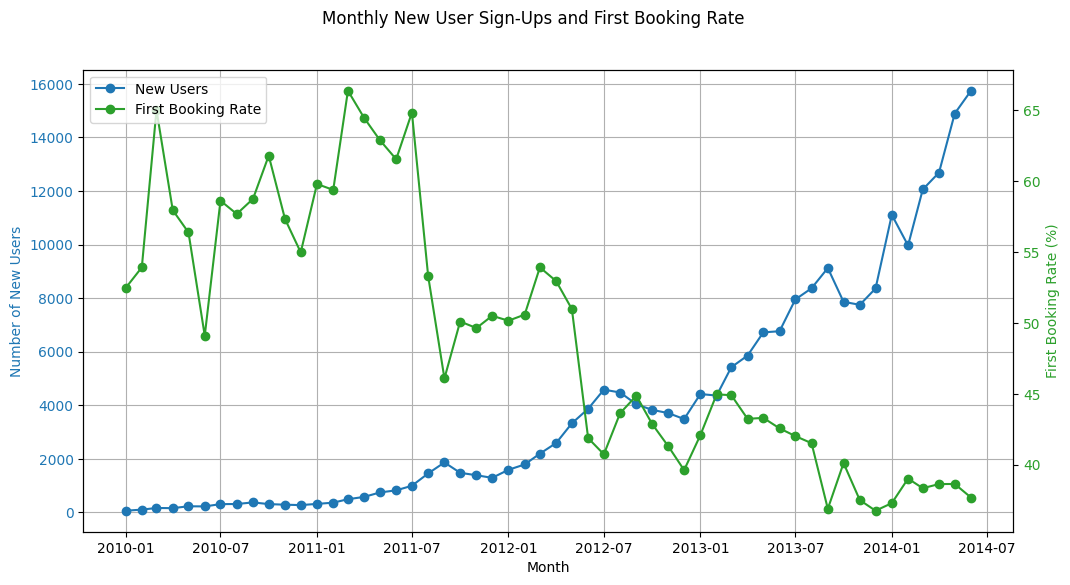

In [32]:

train_user['date_account_created'] = pd.to_datetime(train_user['date_account_created'])
train_user['date_first_booking'] = pd.to_datetime(train_user['date_first_booking'])


train_user['first_booking_made'] = train_user['date_first_booking'].notnull()

train_user['month_account_created'] = train_user['date_account_created'].dt.to_period('M')


monthly_new_users = train_user['month_account_created'].value_counts().sort_index()


monthly_booking_rate = train_user.groupby('month_account_created')['first_booking_made'].mean() * 100


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.set_xlabel('Month')
ax1.set_ylabel('Number of New Users', color='tab:blue')
ax1.plot(monthly_new_users.index.to_timestamp(), monthly_new_users, color='tab:blue', marker='o', label='New Users')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)


ax2 = ax1.twinx()
ax2.set_ylabel('First Booking Rate (%)', color='tab:green')
ax2.plot(monthly_booking_rate.index.to_timestamp(), monthly_booking_rate, color='tab:green', marker='o', label='First Booking Rate')
ax2.tick_params(axis='y', labelcolor='tab:green')


fig.suptitle('Monthly New User Sign-Ups and First Booking Rate')


fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

라인차트로는 계절성 확인이 힘들어서 히트맵으로 시도

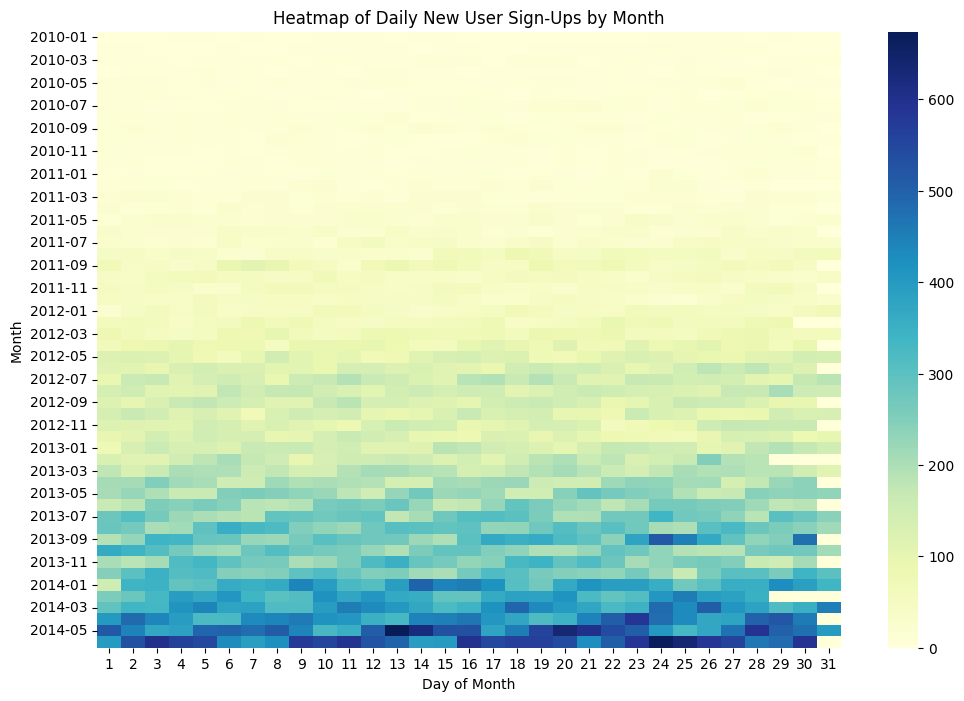

In [19]:

monthly_daily_new_users = train_user.groupby([train_user['date_account_created'].dt.to_period('M'),
                                              train_user['date_account_created'].dt.day]).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(monthly_daily_new_users, cmap='YlGnBu')
plt.title('Heatmap of Daily New User Sign-Ups by Month')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()

첫 예약까지의 평균시간, 최빈값, 중앙값

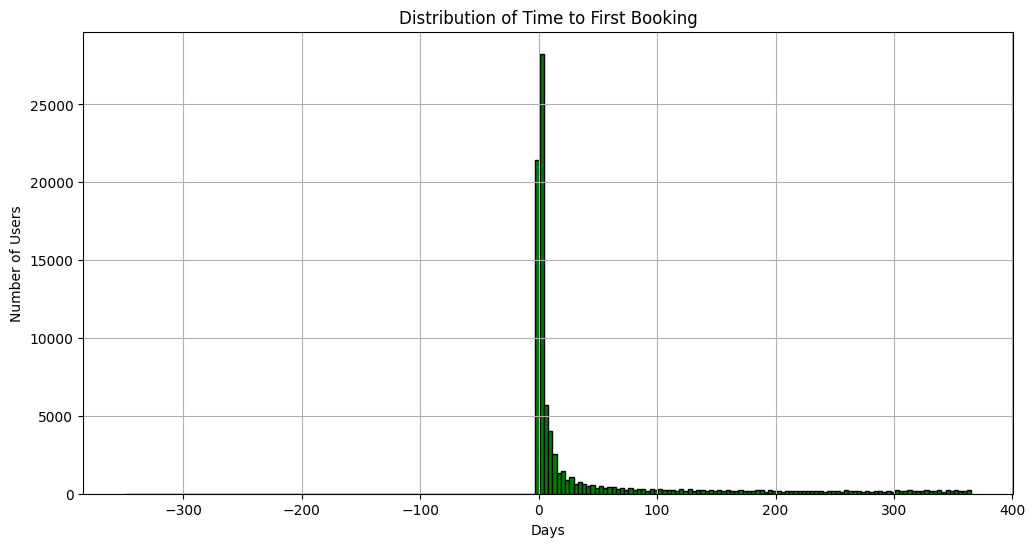

Average Time to First Booking: 44.36249831286273 days
Median Time to First Booking: 3.0 days
Mode of Time to First Booking: 0.0 days


In [30]:


train_user['date_first_booking'] = pd.to_datetime(train_user['date_first_booking'])
train_user['date_account_created'] = pd.to_datetime(train_user['date_account_created'])


train_user['time_to_first_booking'] = (train_user['date_first_booking'] - train_user['date_account_created']).dt.days


plt.figure(figsize=(12, 6))
train_user['time_to_first_booking'].dropna().hist(bins=200, color='green', edgecolor='black')
plt.title('Distribution of Time to First Booking')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


average_time_to_first_booking = train_user['time_to_first_booking'].mean()
median_time_to_first_booking = train_user['time_to_first_booking'].median()
print(f'Average Time to First Booking: {average_time_to_first_booking} days')
print(f'Median Time to First Booking: {median_time_to_first_booking} days')


mode_time_to_first_booking = train_user['time_to_first_booking'].mode()[0]
print(f'Mode of Time to First Booking: {mode_time_to_first_booking} days')


어떤 채널로 유입되었는지 시각화

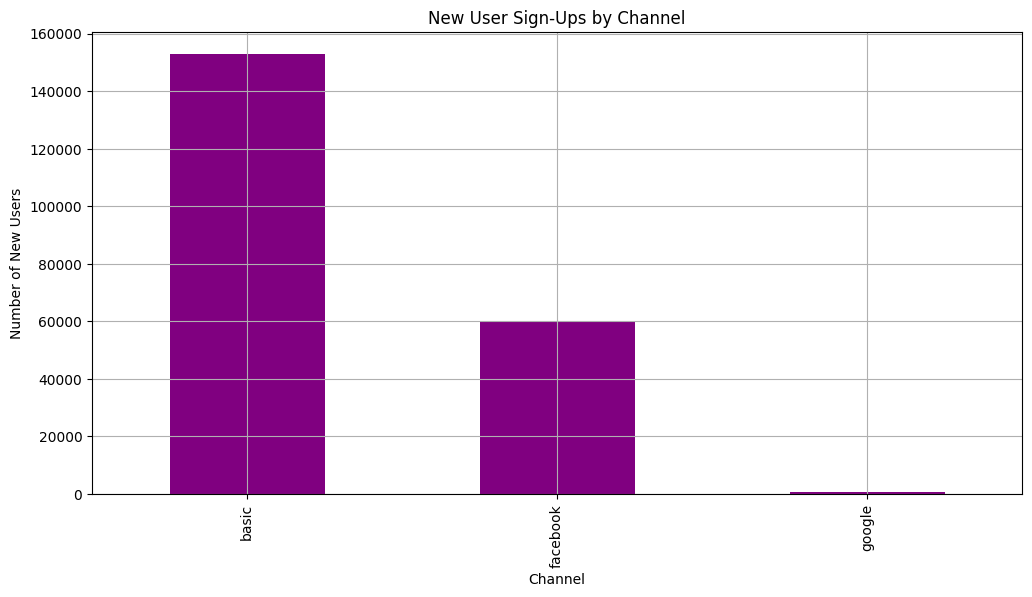

In [31]:
channels = train_user['signup_method'].value_counts()


plt.figure(figsize=(12, 6))
channels.plot(kind='bar', color='purple')
plt.title('New User Sign-Ups by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of New Users')
plt.grid(True)
plt.show()


세션에서 얼마나 시간을 소비하는지, 몇번이나 이용했는지 시각화

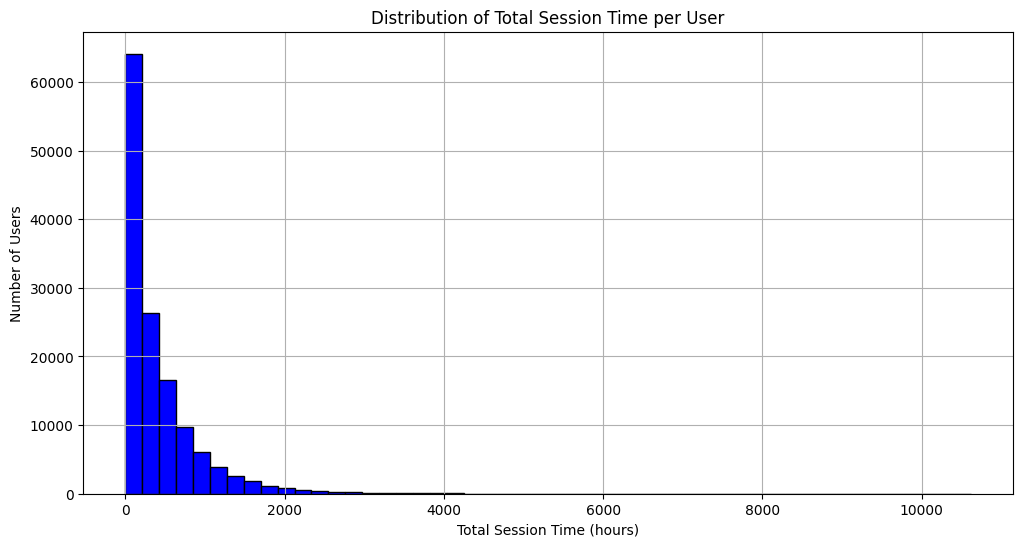

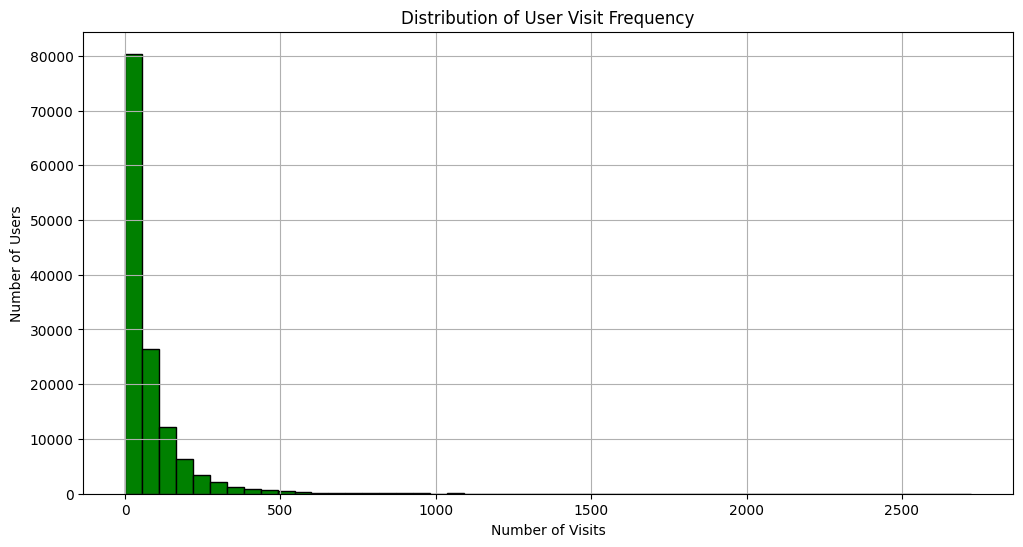

Average Total Session Time: 413.81 hours
Median Total Session Time: 236.19 hours
Mode of Total Session Time: 0.00 hours
Average Number of Visits: 77.75
Median Number of Visits: 41.0
Mode of Number of Visits: 2


In [34]:

user_total_time = session.groupby('user_id')['secs_elapsed'].sum() / 3600  

user_visit_counts = session.groupby('user_id').size()

plt.figure(figsize=(12, 6))
user_total_time.hist(bins=200, color='blue', edgecolor='black')
plt.title('Distribution of Total Session Time per User')
plt.xlabel('Total Session Time (hours)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
user_visit_counts.hist(bins=200, color='green', edgecolor='black')
plt.title('Distribution of User Visit Frequency')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

average_total_time = user_total_time.mean()
median_total_time = user_total_time.median()
mode_total_time = user_total_time.mode()[0]

print(f'Average Total Session Time: {average_total_time:.2f} hours')
print(f'Median Total Session Time: {median_total_time:.2f} hours')
print(f'Mode of Total Session Time: {mode_total_time:.2f} hours')


average_visits = user_visit_counts.mean()
median_visits = user_visit_counts.median()
mode_visits = user_visit_counts.mode()[0]

print(f'Average Number of Visits: {average_visits:.2f}')
print(f'Median Number of Visits: {median_visits}')
print(f'Mode of Number of Visits: {mode_visits}')

국가 부분을 그룹화해서 plotly로 지도 플롯 만들어달라고 GPT에게 시킨부분

In [51]:
country_counts = train_user['country_destination'].value_counts().reset_index()
country_counts.columns = ['country', 'user_count']

In [52]:
# 국가 코드 변환 (ISO-3166 알파-3)
iso_alpha_3 = {
    'AU': 'AUS', 'CA': 'CAN', 'DE': 'DEU', 'ES': 'ESP', 'FR': 'FRA',
    'GB': 'GBR', 'IT': 'ITA', 'NDF': 'N/A', 'NL': 'NLD', 'PT': 'PRT',
    'US': 'USA', 'other': 'N/A'
}

# 알파-2 국가 코드를 알파-3 국가 코드로 변환
country_counts['country'] = country_counts['country'].map(iso_alpha_3)

# N/A 값 제거
country_counts = country_counts[country_counts['country'] != 'N/A']


In [53]:
import plotly.express as px

# 지도 시각화
fig = px.choropleth(
    country_counts,
    locations='country',
    color='user_count',
    hover_name='country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Number of Users by Country'
)

# 지도 표시
fig.show()


In [45]:
total_users = country_counts['user_count'].sum()
print(f"Total Users: {total_users}")

# 사용자 수 상위 5개국
top_5_countries = country_counts.nlargest(5, 'user_count')
print("Top 5 Countries by User Count:")
print(top_5_countries)

# 사용자 수 하위 5개국
bottom_5_countries = country_counts.nsmallest(5, 'user_count')
print("Bottom 5 Countries by User Count:")
print(bottom_5_countries)

# 사용자 수 비율 계산
country_counts['user_percentage'] = (country_counts['user_count'] / total_users) * 100
print("User Percentage by Country:")
print(country_counts)


Total Users: 213451
Top 5 Countries by User Count:
  country  user_count
0     NDF      124543
1      US       62376
2   other       10094
3      FR        5023
4      IT        2835
Bottom 5 Countries by User Count:
   country  user_count
11      PT         217
10      AU         539
9       NL         762
8       DE        1061
7       CA        1428
User Percentage by Country:
   country  user_count  user_percentage
0      NDF      124543        58.347349
1       US       62376        29.222632
2    other       10094         4.728954
3       FR        5023         2.353233
4       IT        2835         1.328174
5       GB        2324         1.088774
6       ES        2249         1.053638
7       CA        1428         0.669006
8       DE        1061         0.497070
9       NL         762         0.356991
10      AU         539         0.252517
11      PT         217         0.101663
